In [25]:
import numpy as np
from copulas.multivariate import Multivariate
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd
import utils

In [26]:
free_parameters = \
{'cov_para_1': -0.2032171878313589, 'cov_para_2': -0.09705798541074251, 'cov_para_3': -0.01207720888328545, 'cov_para_4': -0.16562821474295708, 'cov_para_5': 0.031165717597647413, 'cov_para_6': 0.45706120092331026, 'cov_para_7': 0.35593483991937036, 'cov_para_8': 0.23501621919927318, 'cov_para_9': 0.02730214144187726, 'cov_para_10': -0.14736884340092482, 'beta_1a': 2.4793131769797547, 'beta_1b': 17.056287671628542, 'beta_2a': 6.193287980559434, 'beta_2b': 14.319061046194905, 'beta_3a': 7.224012888962953, 'beta_3b': 15.767156534836811, 'beta_4a': 11.367271271901247, 'beta_4b': 6.802473928217605, 'beta_5a': 1.1189601959050408, 'beta_5b': 11.364225451041479, 'lambda_expon_1': 0.05487860822284998, 'lambda_expon_2': 0.07375675267067743, 'lambda_expon_3': 0.06365766426604727, 'lambda_expon_4': 0.0779408329226152}


In [27]:
free_parameters = \
{"beta_1a": 6.860978007316589, "beta_1b": 17.40923762321472, "beta_2a": 18.496012687683105, "beta_2b": 6.598151326179504, "beta_3a": 13.548948764801025, "beta_3b": 9.540044665336609, "beta_4a": 19.510585069656372, "beta_4b": 17.635220289230347, "beta_5a": 2.291204184293747, "beta_5b": 15.423170328140259, "cov_para_1": -0.38677872419357295, "cov_para_10": 0.8173562049865722, "cov_para_2": -0.16847442984580996, "cov_para_3": 0.21017500162124636, "cov_para_4": -0.2151525914669037, "cov_para_5": 0.5260870814323425, "cov_para_6": 0.5898452281951904, "cov_para_7": 0.4624871850013733, "cov_para_8": -0.3761110424995422, "cov_para_9": -0.31329204440116887, "lambda_expon_1": 0.07633687347173691, "lambda_expon_2": 0.0885584039092064, "lambda_expon_3": 0.05557734173536301, "lambda_expon_4": 0.04063994941115379}

In [28]:
free_para1 = free_parameters['cov_para_1']
free_para2 = free_parameters['cov_para_2']
free_para3 = free_parameters['cov_para_3']
free_para4 = free_parameters['cov_para_4']
free_para5 = free_parameters['cov_para_5']
free_para6 = free_parameters['cov_para_6']
free_para7 = free_parameters['cov_para_7']
free_para8 = free_parameters['cov_para_8']
free_para9 = free_parameters['cov_para_9']
free_para10 = free_parameters['cov_para_10']

diag_1 = 1
diag_2 = np.sqrt(1-free_para1**2)
if (1-free_para2**2-free_para3**2)<0:
    diag_3 = np.sqrt(np.abs(1-free_para2**2-free_para3**2))
else:
    diag_3 = np.sqrt(1-free_para2**2-free_para3**2)

if (1-free_para4**2-free_para5**2-free_para6**2)<0:
    diag_4 = np.sqrt(np.abs(1-free_para4**2-free_para5**2-free_para6**2))
else:
    diag_4 = np.sqrt(1-free_para4**2-free_para5**2-free_para6**2)

if (1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)<0:
    diag_5 = np.sqrt(np.abs(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2))
else:
    diag_5 = np.sqrt(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)



lower_triangular_matrix = np.asarray([[diag_1,0,0,0,0],
                        [free_para1,diag_2,0,0,0],
                        [free_para2,free_para3,diag_3,0,0],
                        [free_para4,free_para5,free_para6,diag_4,0],
                        [free_para7,free_para8,free_para9,free_para10,diag_5]])


cov_matrix = lower_triangular_matrix@lower_triangular_matrix.transpose()


#now, define the marginal distribution of the gaussian copula
univerates = [{'loc': 0,
'scale': 1,
'a': free_parameters['beta_1a'],
'b': free_parameters['beta_1b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_2a'],
'b': free_parameters['beta_2b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_3a'],
'b': free_parameters['beta_3b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_4a'],
'b': free_parameters['beta_4b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_5a'],
'b': free_parameters['beta_5b'],
'type': 'copulas.univariate.beta.BetaUnivariate'}]


#now, we construct the gaussian copula
copula_parameters = {}
copula_parameters['covariance'] = cov_matrix
copula_parameters['univariates'] = univerates
copula_parameters['type'] = 'copulas.multivariate.gaussian.GaussianMultivariate'
copula_parameters['columns'] = [0,1,2,3,4]

new_dist = Multivariate.from_dict(copula_parameters)

In [29]:
cov_matrix

array([[ 1.        , -0.38677872, -0.16847443, -0.21515259,  0.46248719],
       [-0.38677872,  1.        ,  0.25897994,  0.56835951, -0.52571948],
       [-0.16847443,  0.25897994,  1.        ,  0.71486163, -0.45867865],
       [-0.21515259,  0.56835951,  0.71486163,  1.        , -0.01332551],
       [ 0.46248719, -0.52571948, -0.45867865, -0.01332551,  1.24315397]])

In [30]:
#let's sample and plot the marginal distribution
samples = new_dist.sample(5000)

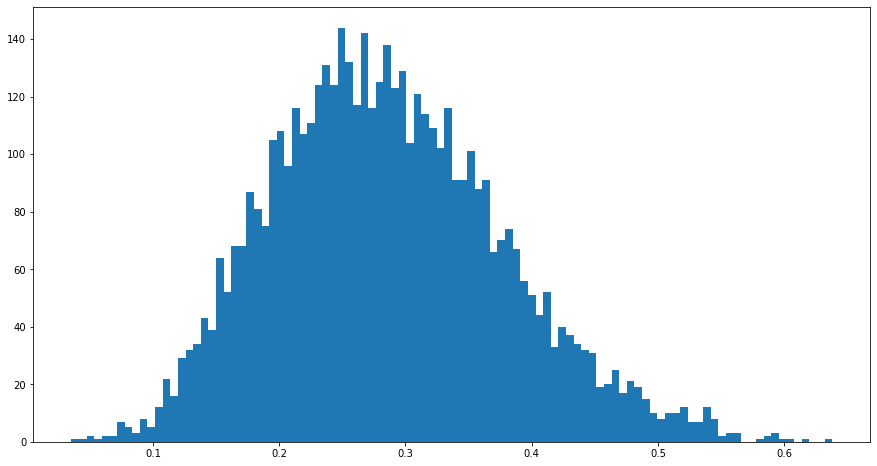

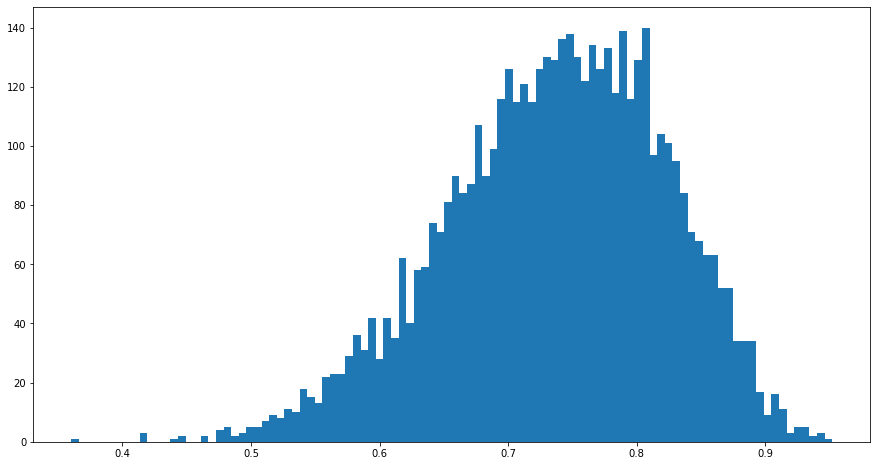

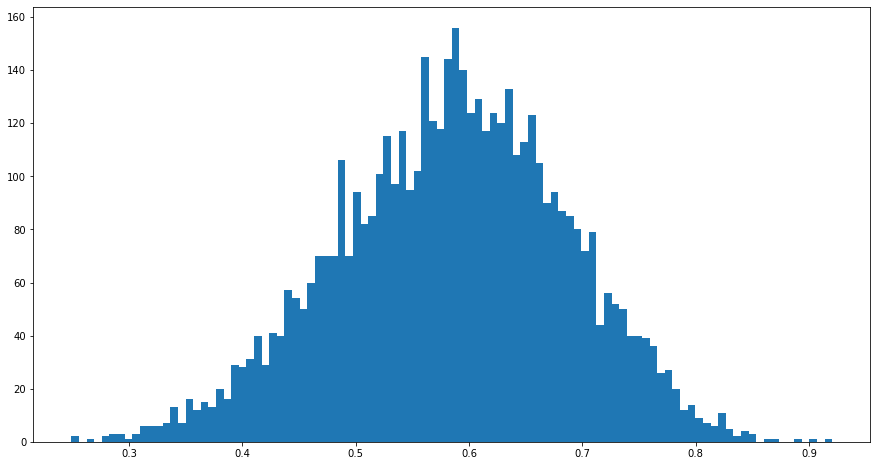

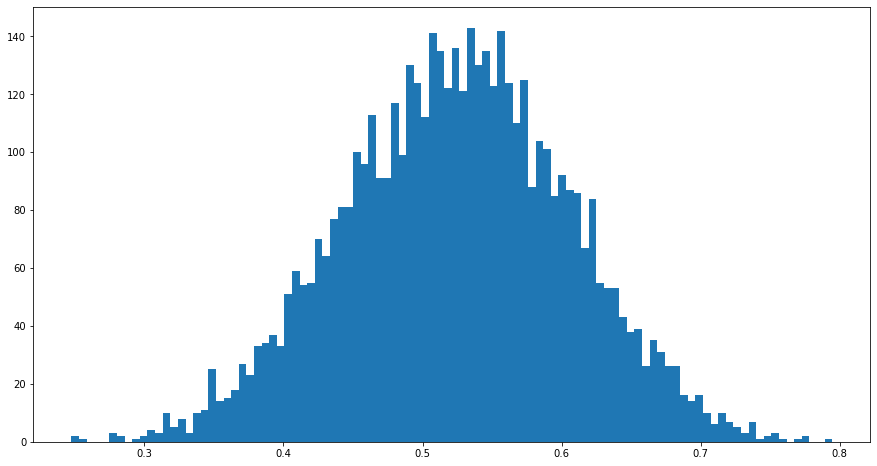

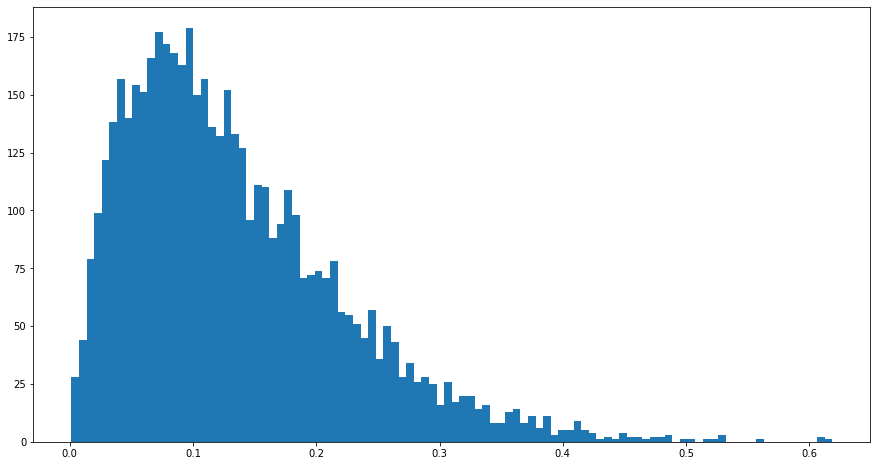

In [31]:
plt.rcParams["figure.figsize"] = (15,8)

for index in range(0,5):
    plt.hist(samples[index],bins = 100)
    plt.show()

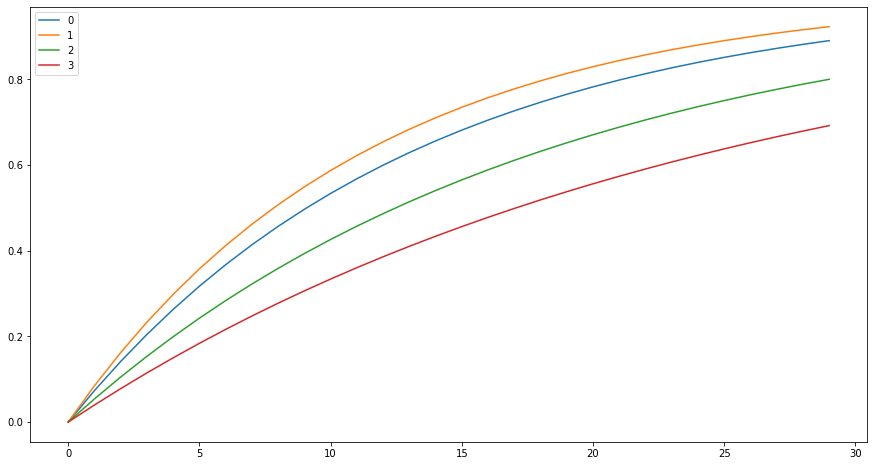

In [32]:
#other parameters needed for transforming the features
lambda_expon_1 = free_parameters['lambda_expon_1']
lambda_expon_2 = free_parameters['lambda_expon_2']
lambda_expon_3 = free_parameters['lambda_expon_3']
lambda_expon_4 = free_parameters['lambda_expon_4']
lambda_expons = [lambda_expon_1,lambda_expon_2,lambda_expon_3,lambda_expon_4]


for line_index in range(0,len(lambda_expons)):

    x_plot = []
    y_plot = []
    
    for fake_days in range(0,30):
        r = expon.cdf(fake_days,scale = 1.0/lambda_expons[line_index])
        y_plot.append(r)
        x_plot.append(fake_days)

    plt.plot(x_plot,y_plot,label = str(line_index))

plt.legend()
plt.show()

In [33]:
import trading_vix
env = trading_vix.trading_vix()

In [34]:
env.index_feature_dataframe

,vix_price_adj_close,vix_adj_close,days_since_5,days_since_6,days_since_7
0,44.680000,10.390000,15,15,148
1,43.720001,10.160000,16,16,149
2,44.320000,10.700000,17,17,150
3,44.799999,11.460000,1,18,151
4,43.279999,10.420000,2,19,152
...,...,...,...,...,...
995,8.190000,20.670000,3,7,80
996,8.080000,20.150000,4,8,81
997,7.710000,18.400000,5,9,82
998,7.710000,18.840000,6,10,83


In [51]:
visualize_time_length = 200

price_history = []
vix_history = []
action_history1 = np.zeros((1,visualize_time_length+1))
action_history2 = np.zeros((1,visualize_time_length+1))
portfolio_value_history = []
transaction_value_history = []

price,current_feature,portfolio_value,current_vix = env.reset(return_price=True)
price_history.append(price)
portfolio_value_history.append(portfolio_value)
transaction_value_history.append(0)
vix_history.append(current_vix)

for time_index in range(0,visualize_time_length):
    
    #compute an action given current observation
    transformed_features = []
    for feature_index in range(len(lambda_expons)):
        transformation = expon.cdf(current_feature[feature_index,0],scale = 1.0/lambda_expons[feature_index])
        min_transformation = 0.1
        transformation = min_transformation*np.exp(np.log(1.0/min_transformation)*transformation)
        transformed_features.append(transformation)
    transformed_features = np.asarray(transformed_features)
    transformed_features = np.reshape(transformed_features,(1,-1))
    #holding_position = expit(current_feature[-1,:][0])
    holding_position = current_feature[-1,:][0]
    if holding_position<0:
        print('holding is less than 0, there is some problem and the holding position is',holding_position)
    if holding_position>1:
        print('holding is greater than 1, there is some problem and the holding position is',holding_position)
    min_transformed_holding = 0.1
    transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
    transformed_holding = np.reshape(transformed_holding,(1,1))
    data_point_for_df = np.concatenate((transformed_features,transformed_holding),axis = 1)

    assert data_point_for_df.shape[1] == 5
    data_point_for_copula = pd.DataFrame(data_point_for_df)
    action = new_dist.cdf(data_point_for_copula)
    
    #apply the action to the environment
    price, current_feature,execute_action,need_to_buy,need_to_sell,portfolio_value,transaction_value,\
    current_vix = env.step(action,return_price=True)

#     if execute_action and need_to_buy:
#         print('buy')
#         print('time index is',time_index)
#     if execute_action and need_to_sell:
#         print('sell')
#         print('time index is',time_index)
    
    #record price and action
    price_history.append(price)
    if execute_action:
        if need_to_buy:
            action_history1[0,time_index+1] = 2 #add 1 because of initial price observation
            #print('record buy action')
        if need_to_sell:
            action_history1[0,time_index+1] = 1
            #print('record sell action')

    action_history2[0,time_index+1] = action 
    portfolio_value_history.append(portfolio_value)
    transaction_value_history.append(transaction_value)
    vix_history.append(current_vix)

In [52]:
print(action_history1.shape)
print(action_history2.shape)
print(len(price_history))
print(len(portfolio_value_history))
print(len(transaction_value_history))
print(len(vix_history))

(1, 201)
(1, 201)
201
201
201
201


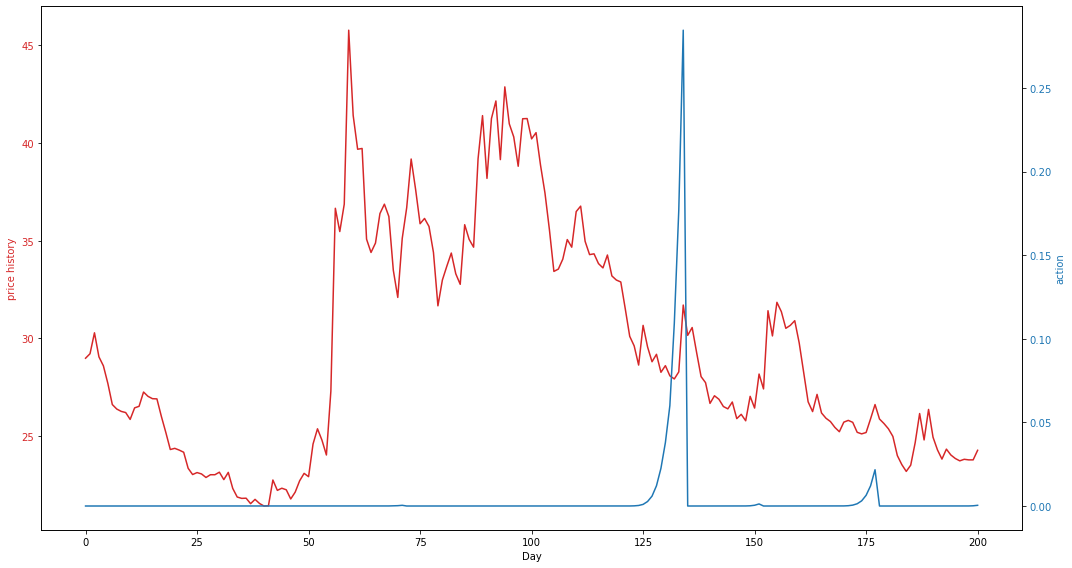

In [53]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

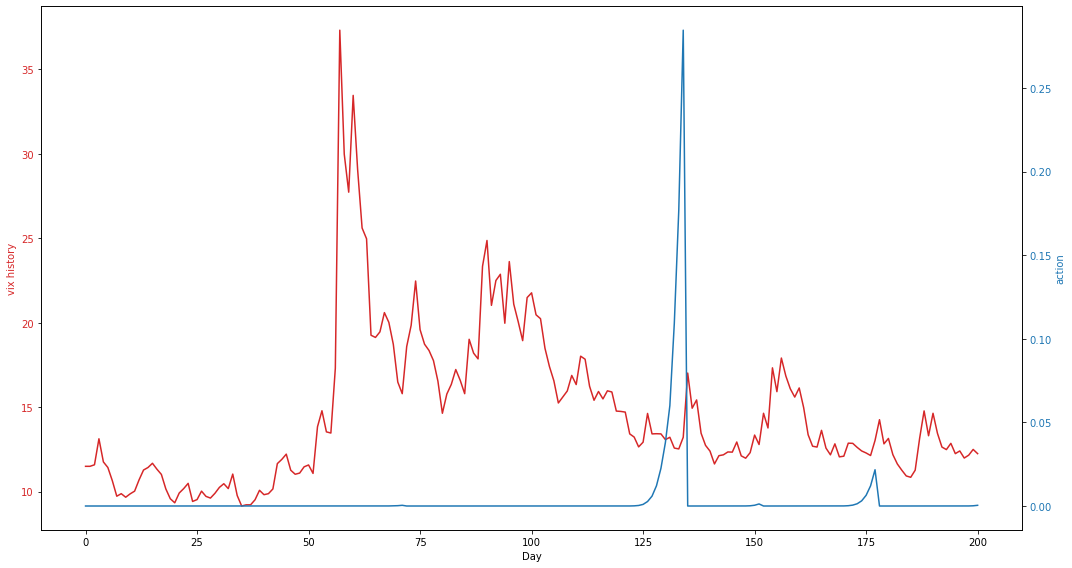

In [54]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('vix history', color=color)
ax1.plot(vix_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

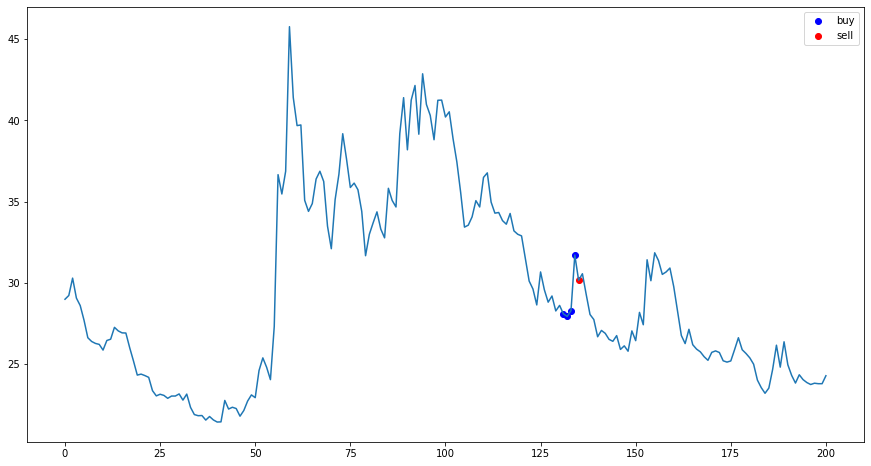

In [55]:
already_plotted_sell_legend = False
already_plotted_buy_legend = False

plt.plot(price_history)
for time_index in range(0,len(action_history1[0])):

    if action_history1[0,time_index]==2:
        #print('the buy price is',price_history[time_index])
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'b',label = 'buy')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'b')

    elif action_history1[0,time_index]==1:
        #print('the sell price is',price_history[time_index])
        #print(' ')
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'r',label = 'sell')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'r')
plt.legend()
plt.show()

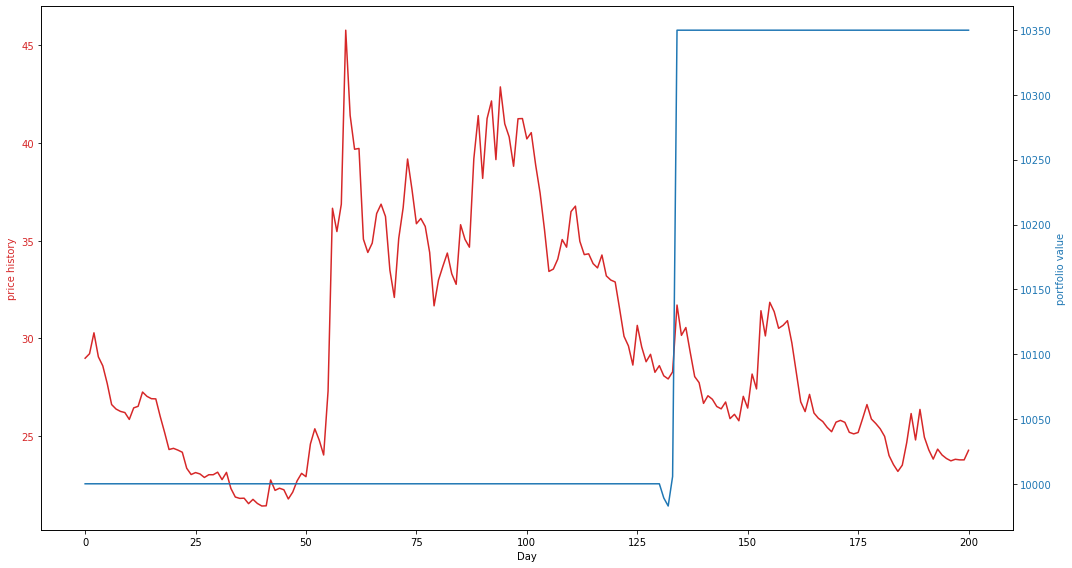

In [56]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('portfolio value', color=color)  # we already handled the x-label with ax1
ax2.plot(portfolio_value_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [57]:
df = pd.DataFrame()
df['suggested stock-total portfolio ratio'] = action_history2[0,:][0:35].tolist()
df['transaction_value'] = transaction_value_history[0:35]
df['execute_action'] = action_history1[0,:][0:35].tolist()

In [58]:
df

,suggested stock-total portfolio ratio,transaction_value,execute_action
0,0.000000e+00,0.000000e+00,0.0
1,6.132160e-11,6.132160e-07,0.0
2,6.278482e-11,6.278482e-07,0.0
3,3.837958e-18,3.837958e-14,0.0
4,7.487694e-18,7.487694e-14,0.0
5,3.354227e-16,3.354227e-12,0.0
6,1.040235e-14,1.040235e-10,0.0
7,2.223136e-13,2.223136e-09,0.0
8,4.802541e-12,4.802541e-08,0.0
9,7.142159e-11,7.142159e-07,0.0
